In [1]:
import pandas as pd
data = pd.read_csv("data.csv")
data

,Games,moves,tokens,size,win
0,FI-100 vs FI-10,18,4,11,79.20
1,FI-10 vs FI-100,18,4,11,13.05
2,FI-100 vs FI-50,18,4,11,54.98
3,FI-50 vs FI-100,18,4,11,32.40
4,FI-50 vs FI-10,18,4,11,68.55
...,...,...,...,...,...
91,FI-10 vs FI-100,18,3,13,13.65
92,FI-100 vs FI-50,18,3,13,54.90
93,FI-50 vs FI-100,18,3,13,31.75
94,FI-50 vs FI-10,18,3,13,66.80


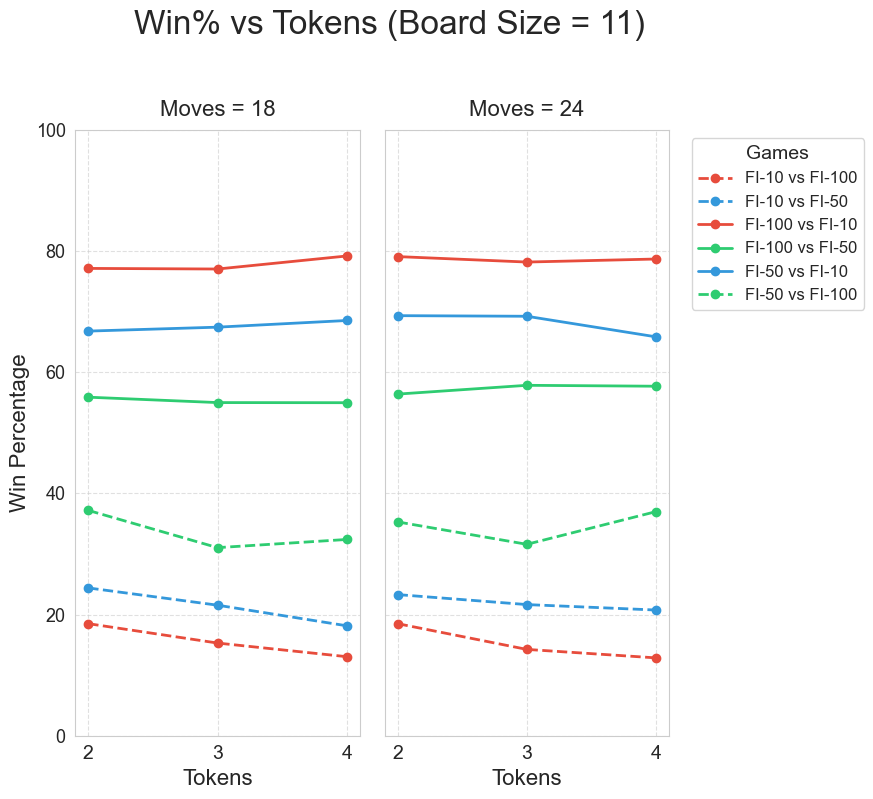

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})

# Filter only for size = 11 and moves in [16, 17, 18]
df_filtered = data[(data['size'] == 11) & (data['moves'].isin([18,24]))]
df_filtered = df_filtered.dropna(subset=['win'])

# Color and line style maps
colors = {
    'FI-10 vs FI-100': '#e74c3c',  # red
    'FI-10 vs FI-50': '#3498db',   # blue
    'FI-50 vs FI-100': '#2ecc71',  # green
    'FI-100 vs FI-10': '#e74c3c',
    'FI-50 vs FI-10': '#3498db',
    'FI-100 vs FI-50': '#2ecc71'
}

linetypes = {
    'FI-10 vs FI-100': "--",
    'FI-10 vs FI-50': "--",
    'FI-50 vs FI-100': "--",
    'FI-100 vs FI-10': "-",
    'FI-50 vs FI-10': "-",
    'FI-100 vs FI-50': "-"
}

# Set up subplots (horizontal layout, shared y-axis)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), sharey=True)

move_values = [18,24]

for i, move in enumerate(move_values):
    ax = axes[i]
    subset = df_filtered[df_filtered['moves'] == move]
    for Games, group in subset.groupby('Games'):
        group = group.sort_values('tokens')
        ax.plot(group['tokens'], group['win'], marker='o',
                markersize=6, linewidth=2,
                label=Games,
                linestyle=linetypes.get(Games, '-'),
                color=colors.get(Games, '#888888'))

    ax.set_title(f'Moves = {move}', pad=10)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Tokens')
    ax.set_xticks(sorted(df_filtered['tokens'].unique()))
    if i == 0:
        ax.set_ylabel('Win Percentage')
    ax.grid(True, linestyle='--', alpha=0.6)

# Put the legend outside the rightmost plot
axes[-1].legend(title='Games', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set overall title
fig.suptitle('Win% vs Tokens (Board Size = 11)', fontsize=24, y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)
plt.show()


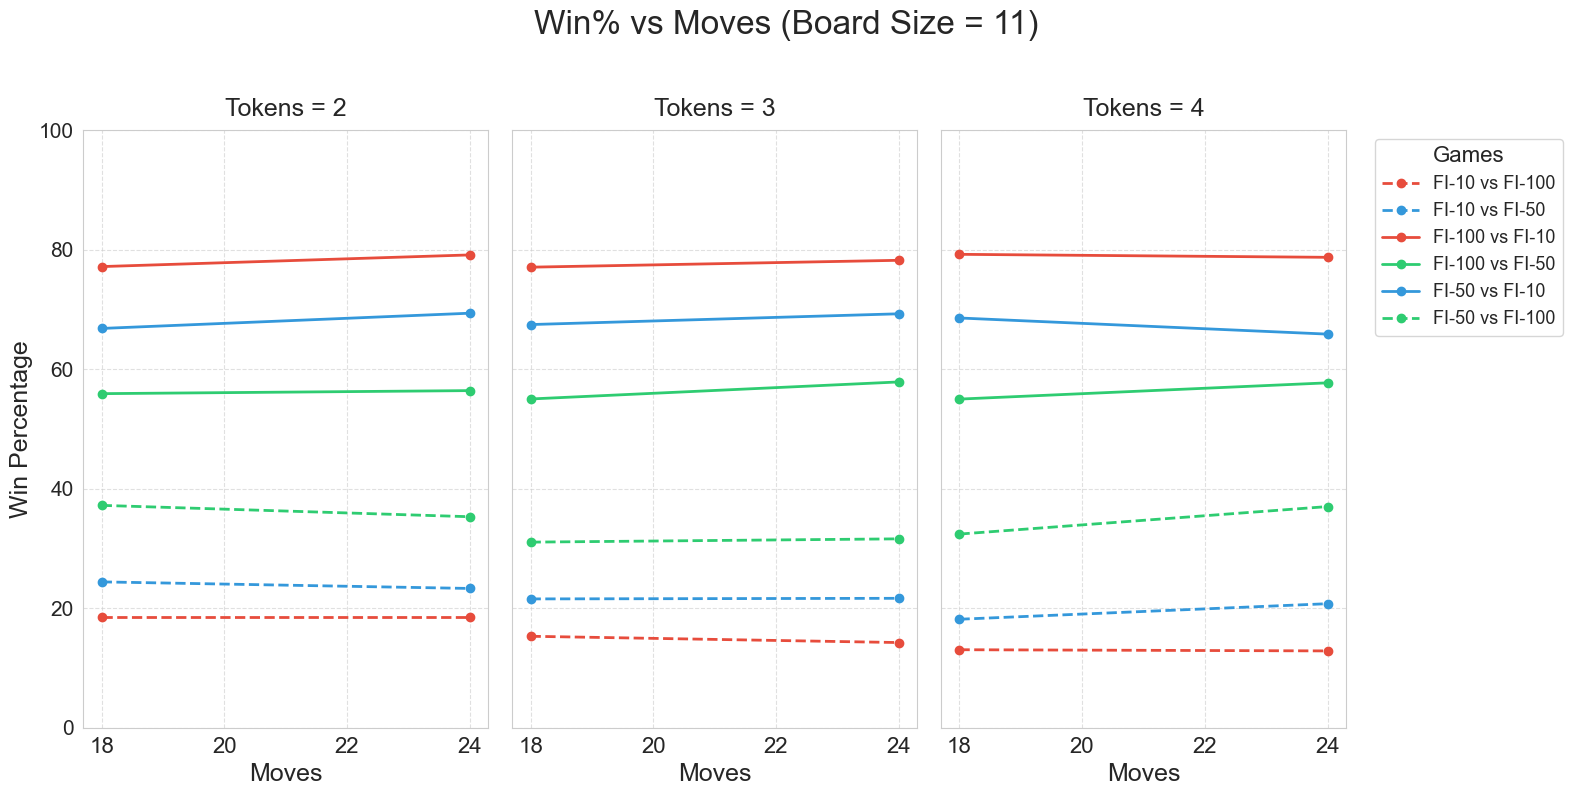

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 15,
    'legend.fontsize': 13,
    'figure.titlesize': 25
})

# Filter only for size = 11 and tokens in [2, 3, 4]
df_filtered = data[(data['size'] == 11) & (data['tokens'].isin([2, 3, 4]))]
df_filtered = df_filtered.dropna(subset=['win'])

# Color and line style maps
colors = {
    'FI-10 vs FI-100': '#e74c3c',  # red
    'FI-10 vs FI-50': '#3498db',   # blue
    'FI-50 vs FI-100': '#2ecc71',  # green
    'FI-100 vs FI-10': '#e74c3c',
    'FI-50 vs FI-10': '#3498db',
    'FI-100 vs FI-50': '#2ecc71'
}

linetypes = {
    'FI-10 vs FI-100': "--",
    'FI-10 vs FI-50': "--",
    'FI-50 vs FI-100': "--",
    'FI-100 vs FI-10': "-",
    'FI-50 vs FI-10': "-",
    'FI-100 vs FI-50': "-"
}

# Set up subplots (horizontal layout, shared y-axis)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), sharey=True)

token_values = [2, 3, 4]

for i, token in enumerate(token_values):
    ax = axes[i]
    subset = df_filtered[df_filtered['tokens'] == token]
    for Games, group in subset.groupby('Games'):
        group = group.sort_values('moves')
        ax.plot(group['moves'], group['win'], marker='o',
                markersize=6, linewidth=2,
                label=Games,
                linestyle=linetypes.get(Games, '-'),
                color=colors.get(Games, '#888888'))

    ax.set_title(f'Tokens = {token}', pad=10)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Moves')
    if i == 0:
        ax.set_ylabel('Win Percentage')
    ax.grid(True, linestyle='--', alpha=0.6)

# Put the legend outside the rightmost plot
axes[-1].legend(title='Games', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set overall title
fig.suptitle('Win% vs Moves (Board Size = 11)', fontsize=24, y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)
plt.show()


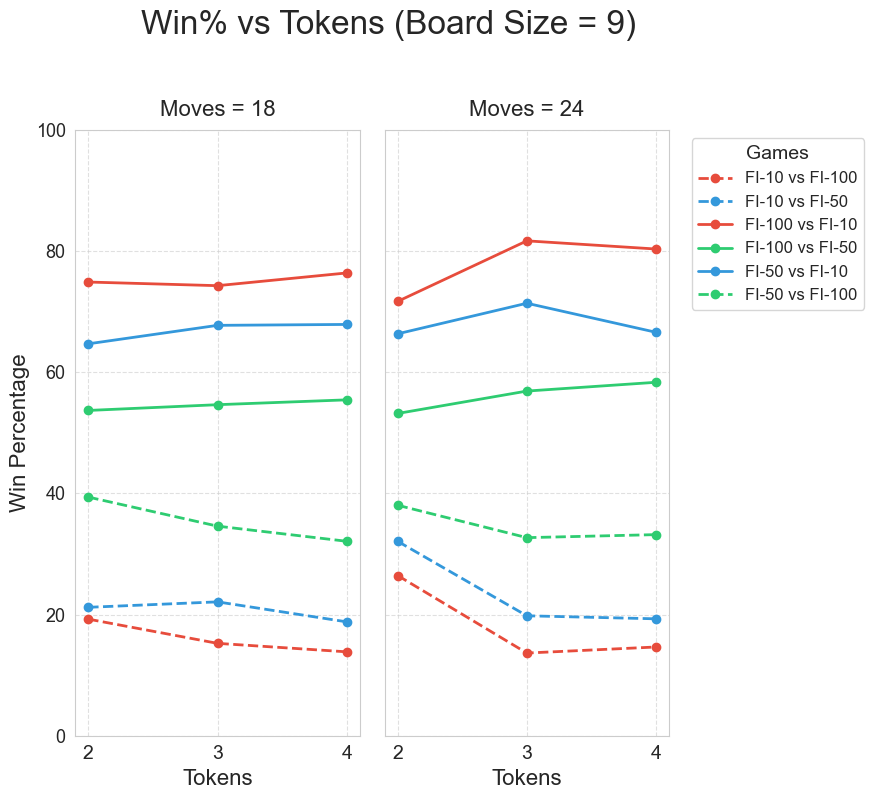

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})

# Filter only for size = 11 and moves in [16, 17, 18]
df_filtered = data[(data['size'] == 9) & (data['moves'].isin([18,24]))]
df_filtered = df_filtered.dropna(subset=['win'])

# Color and line style maps
colors = {
    'FI-10 vs FI-100': '#e74c3c',  # red
    'FI-10 vs FI-50': '#3498db',   # blue
    'FI-50 vs FI-100': '#2ecc71',  # green
    'FI-100 vs FI-10': '#e74c3c',
    'FI-50 vs FI-10': '#3498db',
    'FI-100 vs FI-50': '#2ecc71'
}

linetypes = {
    'FI-10 vs FI-100': "--",
    'FI-10 vs FI-50': "--",
    'FI-50 vs FI-100': "--",
    'FI-100 vs FI-10': "-",
    'FI-50 vs FI-10': "-",
    'FI-100 vs FI-50': "-"
}

# Set up subplots (horizontal layout, shared y-axis)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), sharey=True)

move_values = [18,24]

for i, move in enumerate(move_values):
    ax = axes[i]
    subset = df_filtered[df_filtered['moves'] == move]
    for Games, group in subset.groupby('Games'):
        group = group.sort_values('tokens')
        ax.plot(group['tokens'], group['win'], marker='o',
                markersize=6, linewidth=2,
                label=Games,
                linestyle=linetypes.get(Games, '-'),
                color=colors.get(Games, '#888888'))

    ax.set_title(f'Moves = {move}', pad=10)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Tokens')
    ax.set_xticks(sorted(df_filtered['tokens'].unique()))
    if i == 0:
        ax.set_ylabel('Win Percentage')
    ax.grid(True, linestyle='--', alpha=0.6)

# Put the legend outside the rightmost plot
axes[-1].legend(title='Games', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set overall title
fig.suptitle('Win% vs Tokens (Board Size = 9)', fontsize=24, y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)
plt.show()


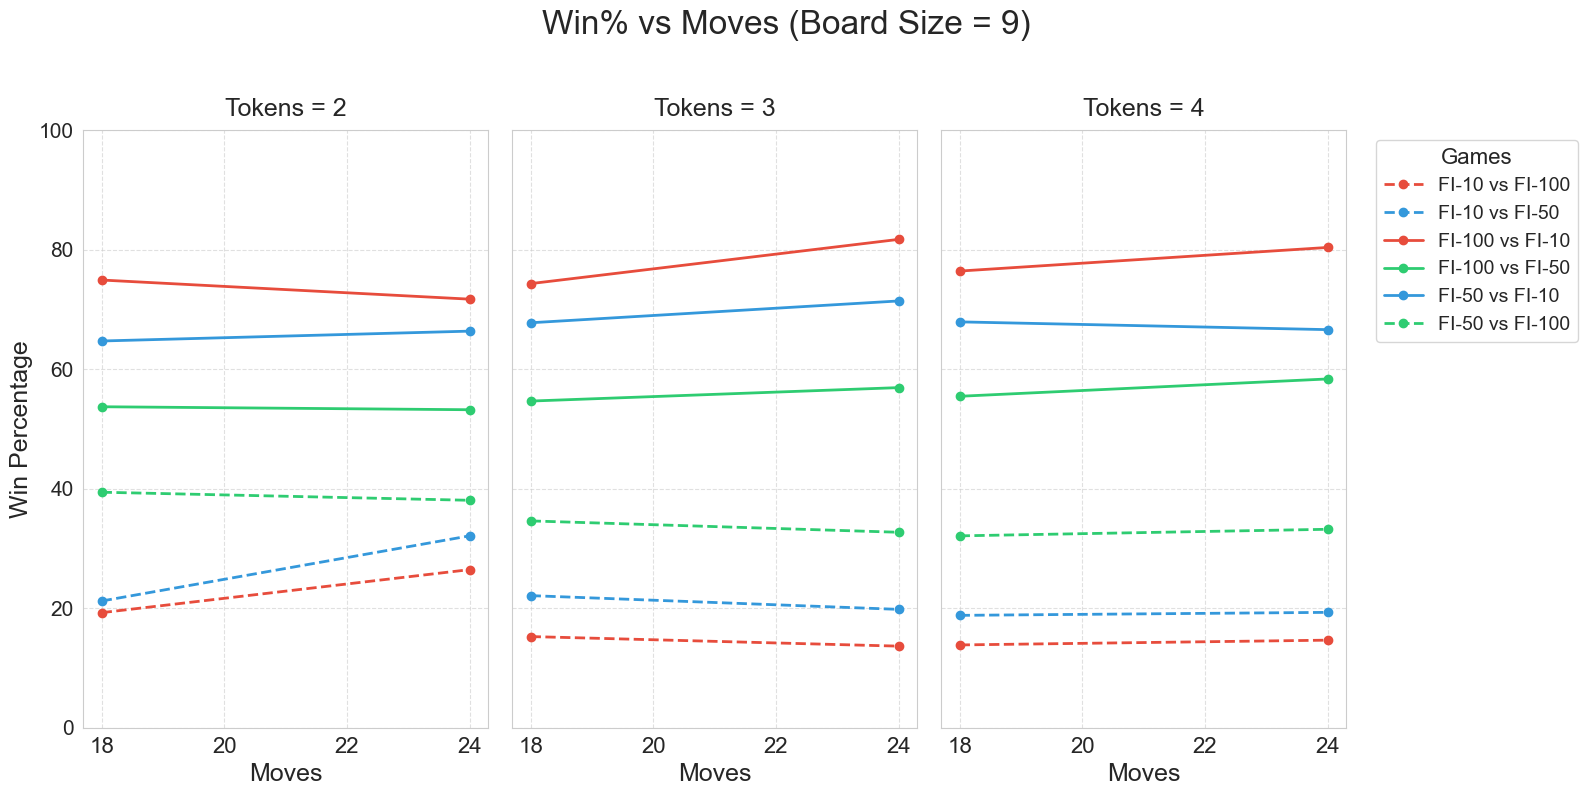

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 16,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 15,
    'legend.fontsize': 14,
    'figure.titlesize': 25
})

# Filter only for size = 11 and tokens in [2, 3, 4]
df_filtered = data[(data['size'] == 9) & (data['tokens'].isin([2, 3, 4]))]
df_filtered = df_filtered.dropna(subset=['win'])

# Color and line style maps
colors = {
    'FI-10 vs FI-100': '#e74c3c',  # red
    'FI-10 vs FI-50': '#3498db',   # blue
    'FI-50 vs FI-100': '#2ecc71',  # green
    'FI-100 vs FI-10': '#e74c3c',
    'FI-50 vs FI-10': '#3498db',
    'FI-100 vs FI-50': '#2ecc71'
}

linetypes = {
    'FI-10 vs FI-100': "--",
    'FI-10 vs FI-50': "--",
    'FI-50 vs FI-100': "--",
    'FI-100 vs FI-10': "-",
    'FI-50 vs FI-10': "-",
    'FI-100 vs FI-50': "-"
}

# Set up subplots (horizontal layout, shared y-axis)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), sharey=True)

token_values = [2, 3, 4]

for i, token in enumerate(token_values):
    ax = axes[i]
    subset = df_filtered[df_filtered['tokens'] == token]
    for Games, group in subset.groupby('Games'):
        group = group.sort_values('moves')
        ax.plot(group['moves'], group['win'], marker='o',
                markersize=6, linewidth=2,
                label=Games,
                linestyle=linetypes.get(Games, '-'),
                color=colors.get(Games, '#888888'))

    ax.set_title(f'Tokens = {token}', pad=10)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Moves')
    if i == 0:
        ax.set_ylabel('Win Percentage')
    ax.grid(True, linestyle='--', alpha=0.6)

# Put the legend outside the rightmost plot
axes[-1].legend(title='Games', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set overall title
fig.suptitle('Win% vs Moves (Board Size = 9)', fontsize=24, y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)
plt.show()


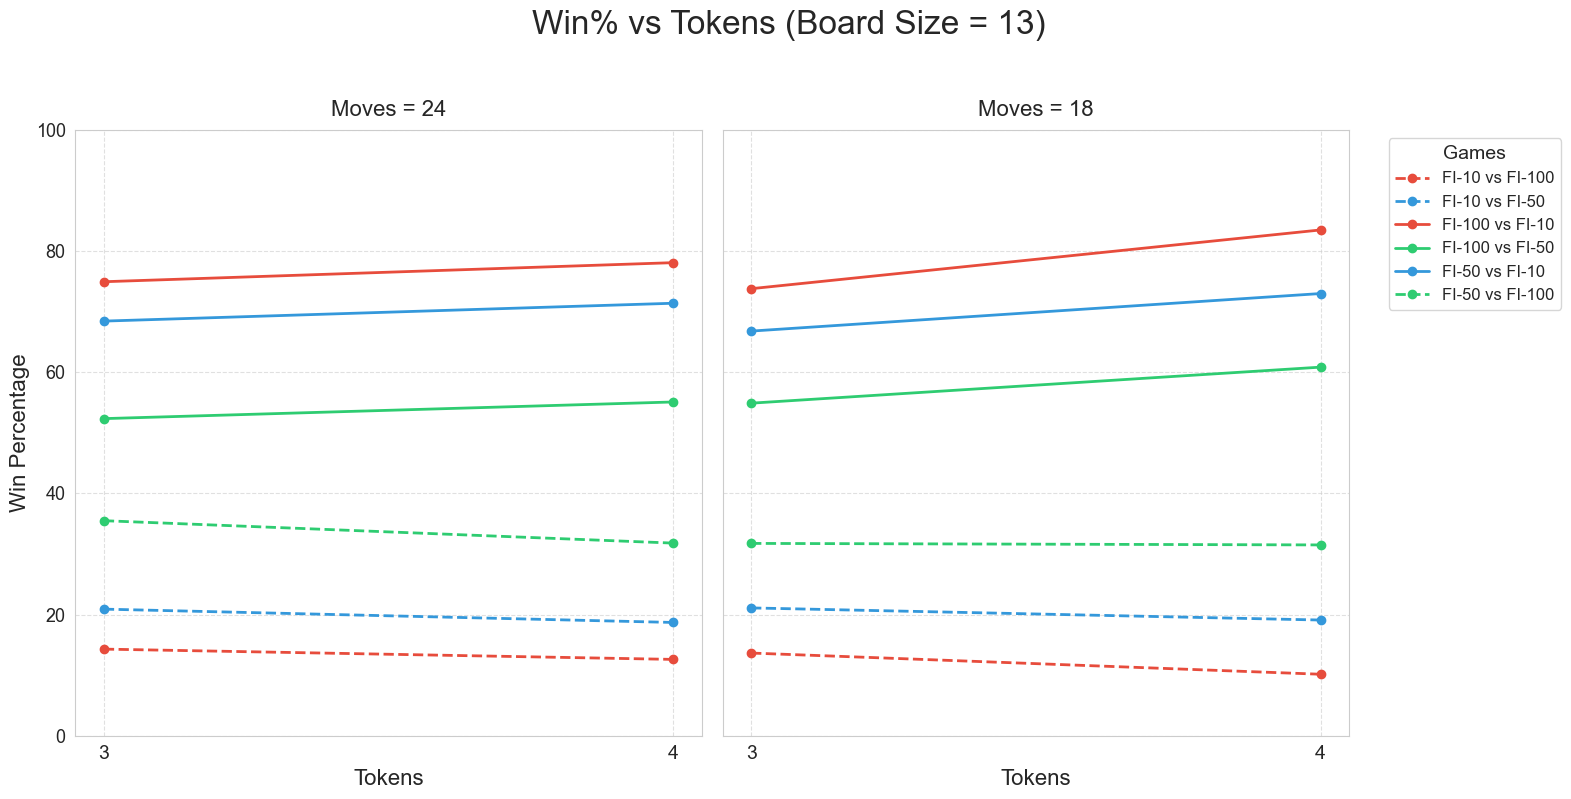

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})

# Filter only for size = 11 and moves in [18, 24]
df_filtered = data[(data['size'] == 13) & (data['moves'].isin([18,24]))]
df_filtered = df_filtered.dropna(subset=['win'])

# Color and line style maps
colors = {
    'FI-10 vs FI-100': '#e74c3c',  # red
    'FI-10 vs FI-50': '#3498db',   # blue
    'FI-50 vs FI-100': '#2ecc71',  # green
    'FI-100 vs FI-10': '#e74c3c',
    'FI-50 vs FI-10': '#3498db',
    'FI-100 vs FI-50': '#2ecc71'
}

linetypes = {
    'FI-10 vs FI-100': "--",
    'FI-10 vs FI-50': "--",
    'FI-50 vs FI-100': "--",
    'FI-100 vs FI-10': "-",
    'FI-50 vs FI-10': "-",
    'FI-100 vs FI-50': "-"
}

# Set up subplots (horizontal layout, shared y-axis)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)

move_values = [24,18]

for i, move in enumerate(move_values):
    ax = axes[i]
    subset = df_filtered[df_filtered['moves'] == move]
    for Games, group in subset.groupby('Games'):
        group = group.sort_values('tokens')
        ax.plot(group['tokens'], group['win'], marker='o',
                markersize=6, linewidth=2,
                label=Games,
                linestyle=linetypes.get(Games, '-'),
                color=colors.get(Games, '#888888'))

    ax.set_title(f'Moves = {move}', pad=10)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Tokens')
    ax.set_xticks(sorted(df_filtered['tokens'].unique()))
    if i == 0:
        ax.set_ylabel('Win Percentage')
    ax.grid(True, linestyle='--', alpha=0.6)

# Put the legend outside the rightmost plot
axes[-1].legend(title='Games', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set overall title
fig.suptitle('Win% vs Tokens (Board Size = 13)', fontsize=24, y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)
plt.show()


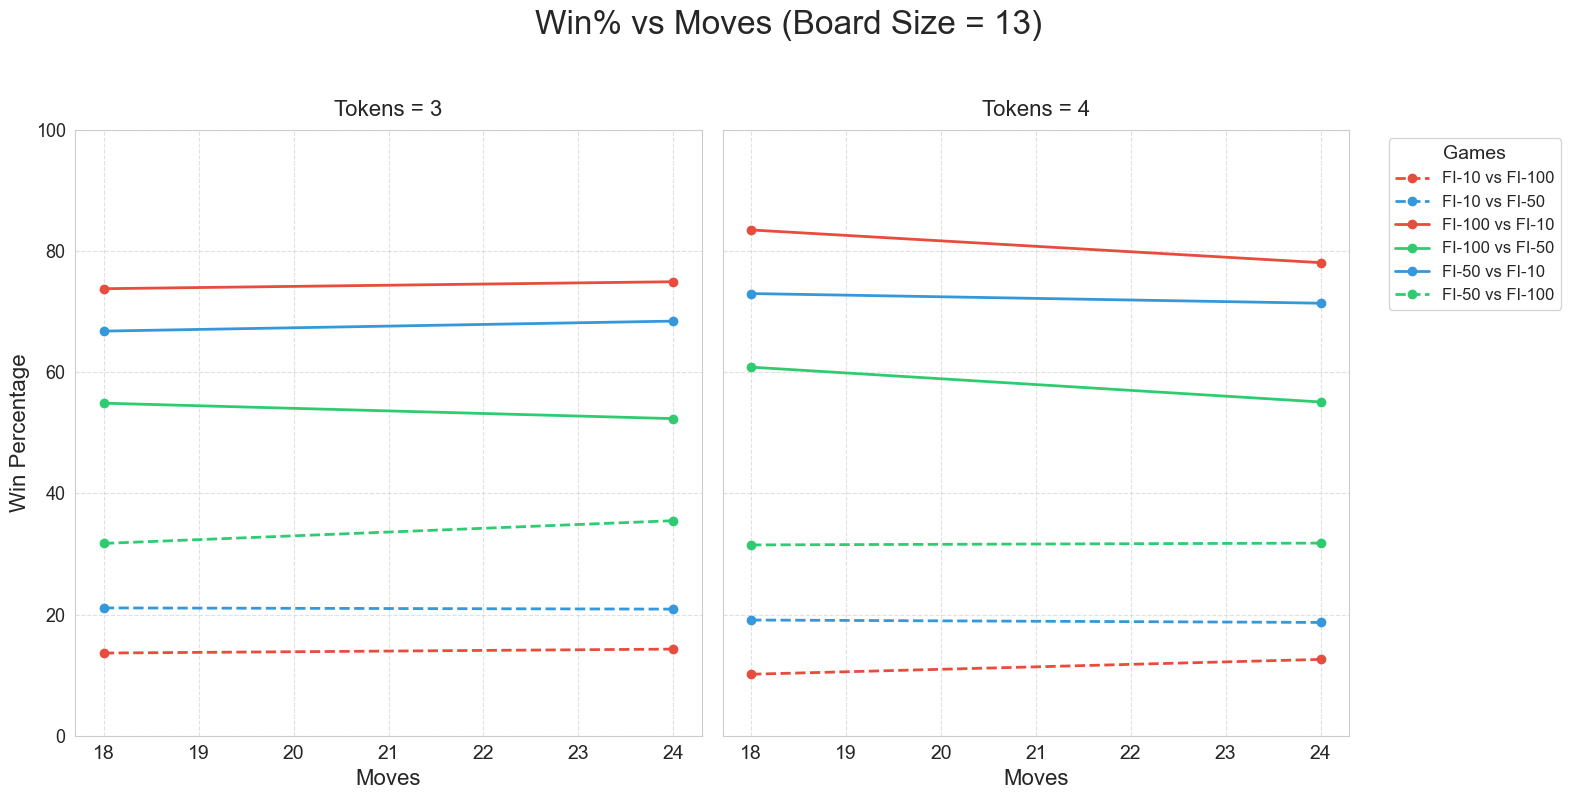

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})

# Filter only for size = 11 and tokens in [2, 3, 4]
df_filtered = data[(data['size'] == 13) & (data['tokens'].isin([3, 4]))]
df_filtered = df_filtered.dropna(subset=['win'])

# Color and line style maps
colors = {
    'FI-10 vs FI-100': '#e74c3c',  # red
    'FI-10 vs FI-50': '#3498db',   # blue
    'FI-50 vs FI-100': '#2ecc71',  # green
    'FI-100 vs FI-10': '#e74c3c',
    'FI-50 vs FI-10': '#3498db',
    'FI-100 vs FI-50': '#2ecc71'
}

linetypes = {
    'FI-10 vs FI-100': "--",
    'FI-10 vs FI-50': "--",
    'FI-50 vs FI-100': "--",
    'FI-100 vs FI-10': "-",
    'FI-50 vs FI-10': "-",
    'FI-100 vs FI-50': "-"
}

# Set up subplots (horizontal layout, shared y-axis)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)

token_values = [3, 4]

for i, token in enumerate(token_values):
    ax = axes[i]
    subset = df_filtered[df_filtered['tokens'] == token]
    for Games, group in subset.groupby('Games'):
        group = group.sort_values('moves')
        ax.plot(group['moves'], group['win'], marker='o',
                markersize=6, linewidth=2,
                label=Games,
                linestyle=linetypes.get(Games, '-'),
                color=colors.get(Games, '#888888'))

    ax.set_title(f'Tokens = {token}', pad=10)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Moves')
    if i == 0:
        ax.set_ylabel('Win Percentage')
    ax.grid(True, linestyle='--', alpha=0.6)

# Put the legend outside the rightmost plot
axes[-1].legend(title='Games', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set overall title
fig.suptitle('Win% vs Moves (Board Size = 13)', fontsize=24, y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)
plt.show()


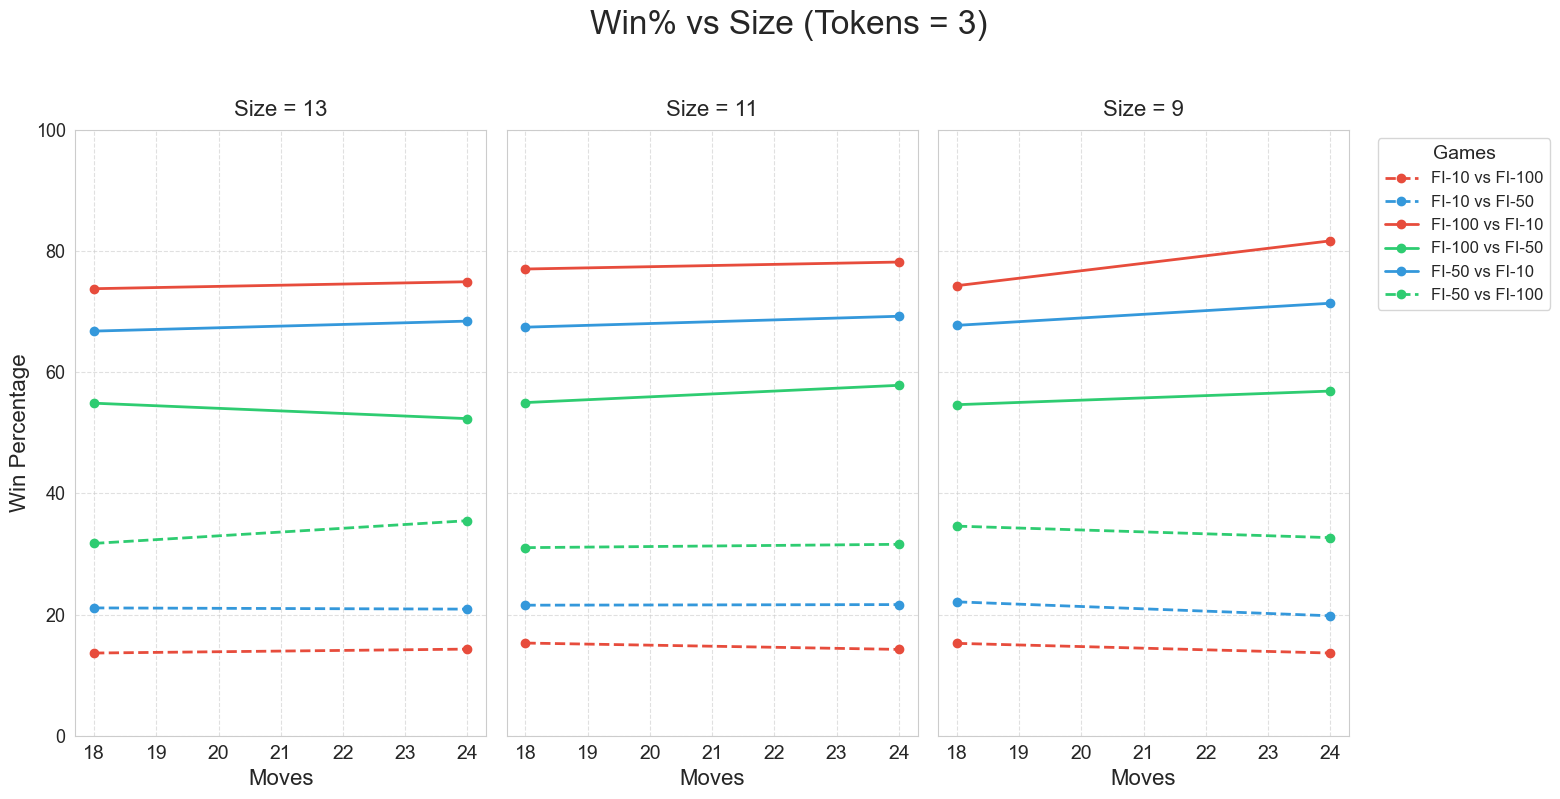

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})

# Filter
df_filtered = data[(data['tokens'] == 3) & (data['moves'].isin([18,24]))]
df_filtered = df_filtered.dropna(subset=['win'])

# Color and line style maps
colors = {
    'FI-10 vs FI-100': '#e74c3c',  # red
    'FI-10 vs FI-50': '#3498db',   # blue
    'FI-50 vs FI-100': '#2ecc71',  # green
    'FI-100 vs FI-10': '#e74c3c',
    'FI-50 vs FI-10': '#3498db',
    'FI-100 vs FI-50': '#2ecc71'
}

linetypes = {
    'FI-10 vs FI-100': "--",
    'FI-10 vs FI-50': "--",
    'FI-50 vs FI-100': "--",
    'FI-100 vs FI-10': "-",
    'FI-50 vs FI-10': "-",
    'FI-100 vs FI-50': "-"
}

# Set up subplots (horizontal layout, shared y-axis)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), sharey=True)

size = [13,11,9]

for i, size in enumerate(size):
    ax = axes[i]
    subset = df_filtered[df_filtered['size'] == size]
    for Games, group in subset.groupby('Games'):
        group = group.sort_values('moves')
        ax.plot(group['moves'], group['win'], marker='o',
                markersize=6, linewidth=2,
                label=Games,
                linestyle=linetypes.get(Games, '-'),
                color=colors.get(Games, '#888888'))

    ax.set_title(f'Size = {size}', pad=10)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Moves')
    if i == 0:
        ax.set_ylabel('Win Percentage')
    ax.grid(True, linestyle='--', alpha=0.6)

# Put the legend outside the rightmost plot
axes[-1].legend(title='Games', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set overall title
fig.suptitle('Win% vs Size (Tokens = 3)', fontsize=24, y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)
plt.show()


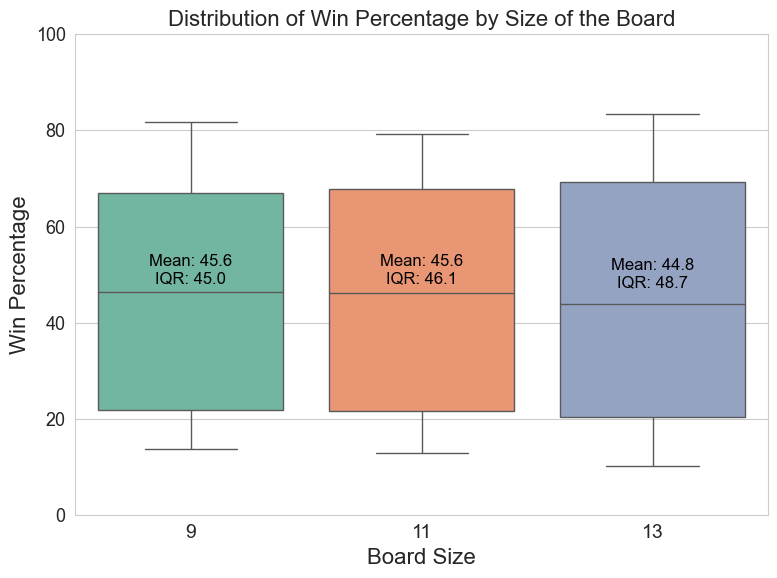

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style and font settings
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})

# Drop NA win values and filter by size
df_filtered = data.dropna(subset=['win'])
df_filtered = df_filtered[df_filtered['size'].isin([13, 11, 9])]

# Create the boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='size', y='win', hue='size', data=df_filtered, palette='Set2')

# Calculate and annotate mean and IQR
summary = df_filtered.groupby('size')['win'].agg(['mean', 'quantile']).reset_index()

# Alternatively, compute manually to extract Q1, Q3
for i, size in enumerate(sorted(df_filtered['size'].unique())):
    group = df_filtered[df_filtered['size'] == size]['win']
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    mean = group.mean()

    # Positioning the text on top of the box
    y_pos = mean + 2  # slightly above Q3
    x_pos = i  # position corresponding to each 'size' on x-axis

    ax.text(x_pos, y_pos, f"Mean: {mean:.1f}\nIQR: {iqr:.1f}", 
            ha='center', va='bottom', fontsize=12, color='black')

# Labeling
plt.title('Distribution of Win Percentage by Size of the Board')
plt.xlabel('Board Size')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
plt.tight_layout()
plt.legend([],[], frameon=False)  # Hide duplicate hue legend
plt.show()


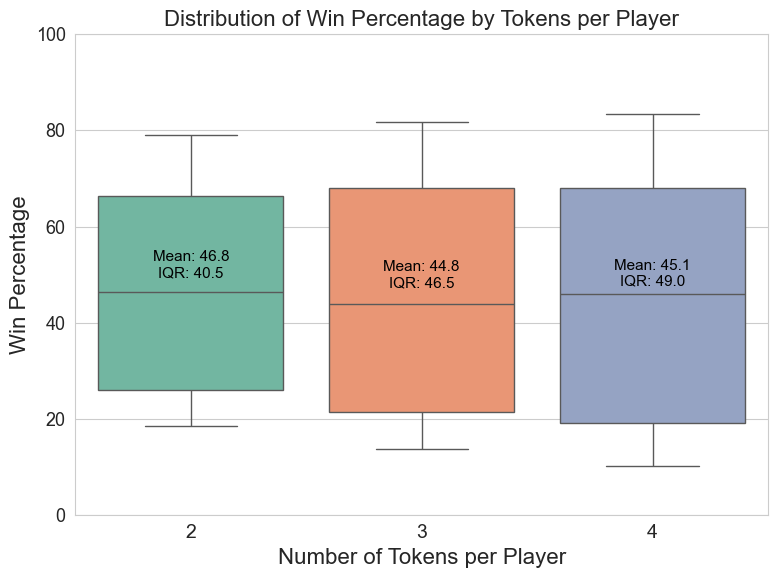

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style and font settings
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})

# Drop NA win values and filter by tokens
df_filtered = data.dropna(subset=['win'])
df_filtered = df_filtered[df_filtered['tokens'].isin([2, 3, 4])]

# Create the boxplot without hue
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='tokens', y='win', hue= 'tokens',data=df_filtered, palette='Set2')

# Get tick positions mapped to token values
token_order = sorted(df_filtered['tokens'].unique())
token_pos = {token: i for i, token in enumerate(token_order)}

# Calculate and annotate mean and IQR
for token in token_order:
    group = df_filtered[df_filtered['tokens'] == token]['win']
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    mean = group.mean()

    # Annotate above each box
    x_pos = token_pos[token]
    y_pos = mean + 2  # just above the top of the box
    ax.text(x_pos, y_pos, f"Mean: {mean:.1f}\nIQR: {iqr:.1f}",
            ha='center', va='bottom', fontsize=11, color='black')

# Labeling
plt.title('Distribution of Win Percentage by Tokens per Player')
plt.xlabel('Number of Tokens per Player')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
plt.legend([],[], frameon=False)  # Hide duplicate hue legend
plt.tight_layout()
plt.show()


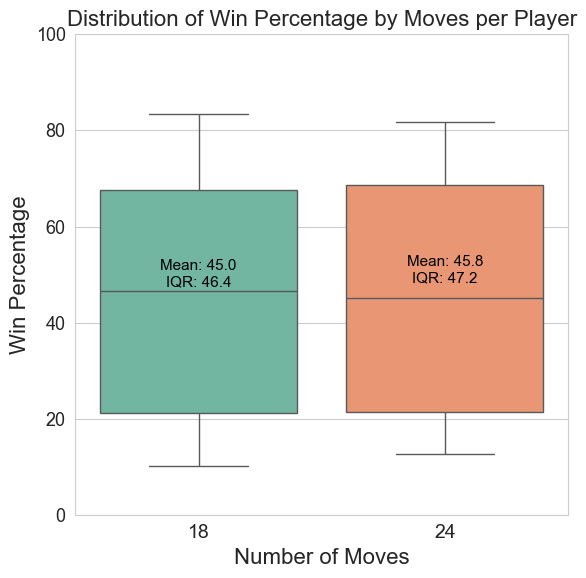

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style and font settings
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})

# Drop NA win values and filter by tokens
df_filtered = data.dropna(subset=['win'])
df_filtered = df_filtered[df_filtered['moves'].isin([18,24])]

# Create the boxplot without hue
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x='moves', y='win', hue= 'moves',data=df_filtered, palette='Set2')

# Get tick positions mapped to token values
move_order = sorted(df_filtered['moves'].unique())
move_pos = {move: i for i, move in enumerate(move_order)}

# Calculate and annotate mean and IQR
for move in move_order:
    group = df_filtered[df_filtered['moves'] == move]['win']
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    mean = group.mean()

    # Annotate above each box
    x_pos = move_pos[move]
    y_pos = mean + 2  # just above the top of the box
    ax.text(x_pos, y_pos, f"Mean: {mean:.1f}\nIQR: {iqr:.1f}",
            ha='center', va='bottom', fontsize=11, color='black')

# Labeling
plt.title('Distribution of Win Percentage by Moves per Player')
plt.xlabel('Number of Moves')
plt.ylabel('Win Percentage')
plt.ylim(0, 100)
plt.legend([],[], frameon=False)  # Hide duplicate hue legend
plt.tight_layout()
plt.show()


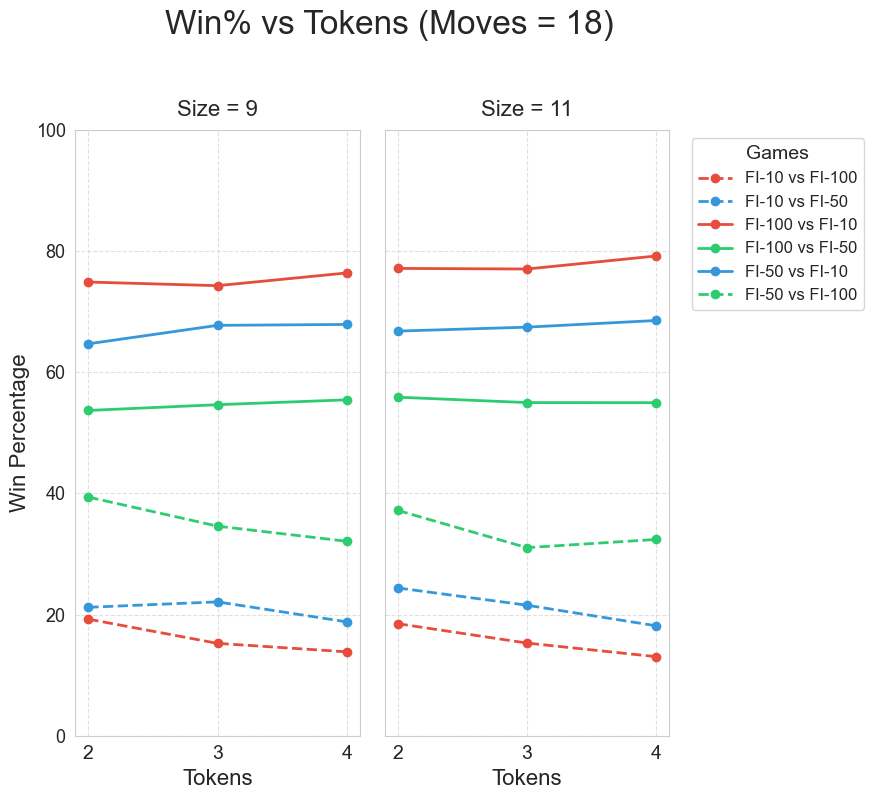

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})

# Filter only for size = 11 and moves in [16, 17, 18]
df_filtered = data[(data['moves'] == 18) & (data['size'].isin([11,9]))]
df_filtered = df_filtered.dropna(subset=['win'])

# Color and line style maps
colors = {
    'FI-10 vs FI-100': '#e74c3c',  # red
    'FI-10 vs FI-50': '#3498db',   # blue
    'FI-50 vs FI-100': '#2ecc71',  # green
    'FI-100 vs FI-10': '#e74c3c',
    'FI-50 vs FI-10': '#3498db',
    'FI-100 vs FI-50': '#2ecc71'
}

linetypes = {
    'FI-10 vs FI-100': "--",
    'FI-10 vs FI-50': "--",
    'FI-50 vs FI-100': "--",
    'FI-100 vs FI-10': "-",
    'FI-50 vs FI-10': "-",
    'FI-100 vs FI-50': "-"
}

# Set up subplots (horizontal layout, shared y-axis)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), sharey=True)

size_values = [9,11]

for i, size in enumerate(size_values):
    ax = axes[i]
    subset = df_filtered[df_filtered['size'] == size]
    for Games, group in subset.groupby('Games'):
        group = group.sort_values('tokens')
        ax.plot(group['tokens'], group['win'], marker='o',
                markersize=6, linewidth=2,
                label=Games,
                linestyle=linetypes.get(Games, '-'),
                color=colors.get(Games, '#888888'))

    ax.set_title(f'Size = {size}', pad=10)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Tokens')
    ax.set_xticks(sorted(df_filtered['tokens'].unique()))
    if i == 0:
        ax.set_ylabel('Win Percentage of 1st player')
    ax.grid(True, linestyle='--', alpha=0.6)

# Put the legend outside the rightmost plot
axes[-1].legend(title='Games', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set overall title
fig.suptitle('Win% vs Tokens (Moves = 18)', fontsize=24, y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)
plt.show()


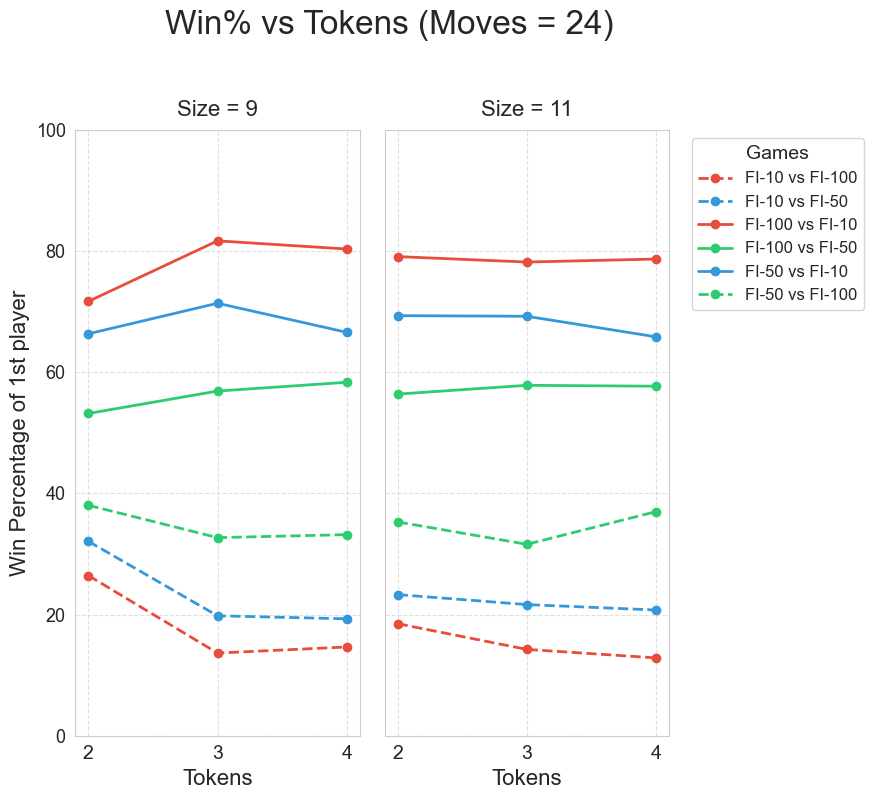

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern, clean style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})

# Filter only for size = 11 and moves in [16, 17, 18]
df_filtered = data[(data['moves'] == 24) & (data['size'].isin([11,9]))]
df_filtered = df_filtered.dropna(subset=['win'])

# Color and line style maps
colors = {
    'FI-10 vs FI-100': '#e74c3c',  # red
    'FI-10 vs FI-50': '#3498db',   # blue
    'FI-50 vs FI-100': '#2ecc71',  # green
    'FI-100 vs FI-10': '#e74c3c',
    'FI-50 vs FI-10': '#3498db',
    'FI-100 vs FI-50': '#2ecc71'
}

linetypes = {
    'FI-10 vs FI-100': "--",
    'FI-10 vs FI-50': "--",
    'FI-50 vs FI-100': "--",
    'FI-100 vs FI-10': "-",
    'FI-50 vs FI-10': "-",
    'FI-100 vs FI-50': "-"
}

# Set up subplots (horizontal layout, shared y-axis)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), sharey=True)

size_values = [9,11]

for i, size in enumerate(size_values):
    ax = axes[i]
    subset = df_filtered[df_filtered['size'] == size]
    for Games, group in subset.groupby('Games'):
        group = group.sort_values('tokens')
        ax.plot(group['tokens'], group['win'], marker='o',
                markersize=6, linewidth=2,
                label=Games,
                linestyle=linetypes.get(Games, '-'),
                color=colors.get(Games, '#888888'))

    ax.set_title(f'Size = {size}', pad=10)
    ax.set_ylim(0, 100)
    ax.set_xlabel('Tokens')
    ax.set_xticks(sorted(df_filtered['tokens'].unique()))
    if i == 0:
        ax.set_ylabel('Win Percentage of 1st player')
    ax.grid(True, linestyle='--', alpha=0.6)

# Put the legend outside the rightmost plot
axes[-1].legend(title='Games', bbox_to_anchor=(1.05, 1), loc='upper left')

# Set overall title
fig.suptitle('Win% vs Tokens (Moves = 24)', fontsize=24, y=1)

plt.tight_layout()
plt.subplots_adjust(top=0.85, right=0.85)
plt.show()


In [2]:
import pandas as pd
data = pd.read_csv("same_strat.csv")
data

,Player 1,Player 2,win,moves,tokens,size
0,Aggressive,Aggressive,48.12,24,4,13
1,Responsible Pair,Responsible Pair,49.68,24,4,13
2,Naive,Naive,49.83,24,4,13
3,Aggressive,Aggressive,48.43,18,4,13
4,Responsible Pair,Responsible Pair,49.28,18,4,13
...,...,...,...,...,...,...
85,Responsible Pair,Responsible Pair,49.84,24,3,7
86,Naive,Naive,52.60,24,2,7
87,Wise Naive,Wise Naive,55.44,24,2,7
88,Aggressive,Aggressive,51.49,24,2,7


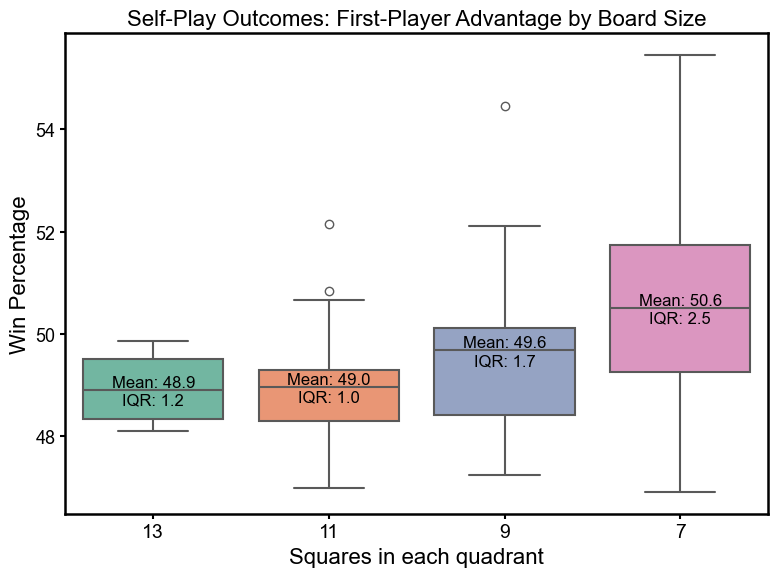

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Use no grid or dark background if desired
sns.set_style("ticks")  # Cleaner than 'whitegrid'
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22,
    'axes.edgecolor': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'text.color': 'black',
    'axes.linewidth': 1.8,
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5
})

# Drop NA win values and filter by size
df_filtered = data.dropna(subset=['win'])
df_filtered = df_filtered[df_filtered['size'].isin([13, 11, 9, 7])]

# Create the boxplot
plt.figure(figsize=(8, 6))
order = [13, 11, 9, 7]
ax = sns.boxplot(x='size', y='win', hue='size', data=df_filtered, 
                 palette='Set2', linewidth=1.5, order=order, hue_order=order)

# Darken all spines (borders)
for spine in ax.spines.values():
    spine.set_color('black')
    spine.set_linewidth(1.8)

# Darken tick lines and labels
ax.tick_params(axis='both', colors='black', width=1.5)

# Remove or darken grid lines (optional)
ax.grid(False)  # Or use ax.grid(color='black', linestyle='--', linewidth=0.5)

# Annotate mean and IQR
for i, size in enumerate(sorted(df_filtered['size'].unique(),reverse=True)):
    group = df_filtered[df_filtered['size'] == size]['win']
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    mean = group.mean()

    y_pos = group.median() - 0.35
    ax.text(i, y_pos, f"Mean: {mean:.1f}\nIQR: {iqr:.1f}",
            ha='center', va='bottom', fontsize=12, color='black')

# Title and labels
plt.title('Self-Play Outcomes: First-Player Advantage by Board Size', color='black')
plt.xlabel('Squares in each quadrant')
plt.ylabel('Win Percentage')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()



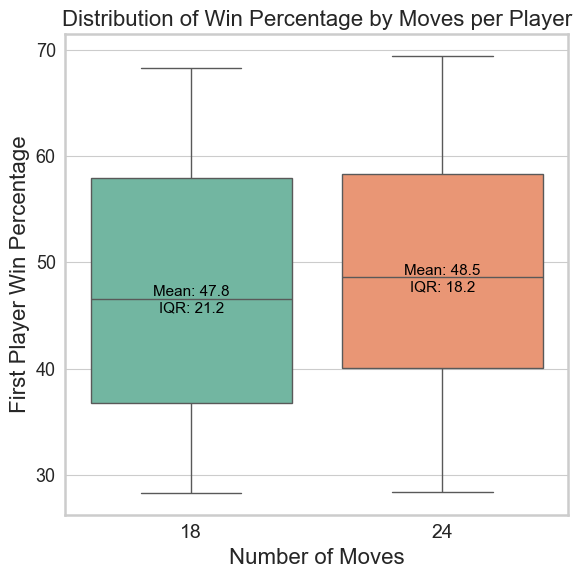

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style and font settings
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 16,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 13,
    'legend.fontsize': 12,
    'figure.titlesize': 22
})
data = pd.read_csv("rulevsrule.csv")
# Drop NA win values and filter by tokens
df_filtered = data.dropna(subset=['win'])
df_filtered = df_filtered[df_filtered['moves'].isin([18,24])]

# Create the boxplot without hue
plt.figure(figsize=(6, 6))
ax = sns.boxplot(x='moves', y='win', hue= 'moves',data=df_filtered, palette='Set2')

# Get tick positions mapped to token values
move_order = sorted(df_filtered['moves'].unique())
move_pos = {move: i for i, move in enumerate(move_order)}

# Calculate and annotate mean and IQR
for move in move_order:
    group = df_filtered[df_filtered['moves'] == move]['win']
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    mean = group.mean()

    # Annotate above each box
    x_pos = move_pos[move]
    y_pos = group.median()-1.6  # just above the top of the box
    ax.text(x_pos, y_pos, f"Mean: {mean:.1f}\nIQR: {iqr:.1f}",
            ha='center', va='bottom', fontsize=11, color='black')

# Labeling
plt.title('Distribution of Win Percentage by Moves per Player')
plt.xlabel('Number of Moves')
plt.ylabel('First Player Win Percentage')
# plt.ylim(0, 100)
plt.legend([],[], frameon=False)  # Hide duplicate hue legend
plt.tight_layout()
plt.show()
